<a href="https://colab.research.google.com/github/vitorlacerda2/Analise-de-Pagamento/blob/main/Analise_de_Pagamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resumo das análises:

1. Distribuição dos Pagamentos por Status:
   - Utilizamos um gráfico de barras para visualizar a quantidade de pagamentos em cada status (como "PAID", "PENDING").
   - Isso nos ajuda a entender se há muitos pagamentos pendentes ou cancelados, o que pode indicar problemas no fluxo de pagamentos.

2. Análise dos Valores de Pagamento por Método e Status:
   - Usamos um **boxplot** para comparar os valores dos pagamentos (`payment_amount`) segmentados por método de pagamento e status.
   - O objetivo é ver como os valores variam entre os métodos e se há alguma tendência associada ao status do pagamento, como pagamentos pendentes ou concluídos tendo valores médios diferentes.

#Por que fazemos essas análises?

Essas análises são importantes para:

1.Identificação de Problemas:
   - Ao olhar para a distribuição dos pagamentos por status, podemos identificar gargalos ou problemas. Por exemplo, muitos pagamentos "PENDING" podem sugerir dificuldades na finalização de transações, enquanto muitos pagamentos "CANCELLED" podem indicar insatisfação do cliente ou problemas técnicos.

2.Entendimento dos Métodos de Pagamento:
   - Analisar os valores de pagamento por método e status permite entender melhor o comportamento dos clientes. Métodos de pagamento diferentes podem ter valores médios diferentes, e algumas formas de pagamento podem estar associadas a mais pendências ou cancelamentos, o que pode ajudar a focar esforços para melhorar a experiência de pagamento.

3.Otimização de Operações:
   - Com essas análises, a empresa pode ajustar suas políticas de pagamento, como priorizar métodos que têm menos taxas ou que finalizam os pagamentos mais rapidamente, ou até melhorar as condições de métodos que têm muitos cancelamentos ou problemas.

Essas informações são valiosas para otimizar o processo de pagamento, melhorar a satisfação do cliente e reduzir a perda de receitas.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/payments.csv")

In [ ]:
df

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID
...,...,...,...,...,...,...
400829,5535356,92271189,15.80,0.24,PAYMENT_LINK,PAID
400830,5535359,90051751,93.30,1.87,PAYMENT_LINK,PAID
400831,5536362,92645440,43.20,0.65,STORE_DIRECT_PAYMENT,PAID
400832,5538634,92332079,59.90,0.90,PAYMENT_LINK,PAID


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
df['payment_id'].plot(kind='hist', bins=20, title='payment_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['payment_order_id'].plot(kind='hist', bins=20, title='payment_order_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['payment_amount'].plot(kind='hist', bins=20, title='payment_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['payment_fee'].plot(kind='hist', bins=20, title='payment_fee')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('payment_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='payment_id', y='payment_order_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='payment_order_id', y='payment_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='payment_amount', y='payment_fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['payment_id']
  ys = series['payment_order_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('payment_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('payment_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='payment_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('payment_id')
_ = plt.ylabel('payment_order_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['payment_id']
  ys = series['payment_amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('payment_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('payment_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='payment_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('payment_id')
_ = plt.ylabel('payment_amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['payment_id']
  ys = series['payment_fee']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('payment_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('payment_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='payment_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('payment_id')
_ = plt.ylabel('payment_fee')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['payment_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'payment_id'}, axis=1)
              .sort_values('payment_id', ascending=True))
  xs = counted['payment_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('payment_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('payment_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='payment_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('payment_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['payment_id'].plot(kind='line', figsize=(8, 4), title='payment_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['payment_order_id'].plot(kind='line', figsize=(8, 4), title='payment_order_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['payment_amount'].plot(kind='line', figsize=(8, 4), title='payment_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['payment_fee'].plot(kind='line', figsize=(8, 4), title='payment_fee')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['payment_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='payment_id', y='payment_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['payment_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='payment_order_id', y='payment_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['payment_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='payment_amount', y='payment_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['payment_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='payment_fee', y='payment_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

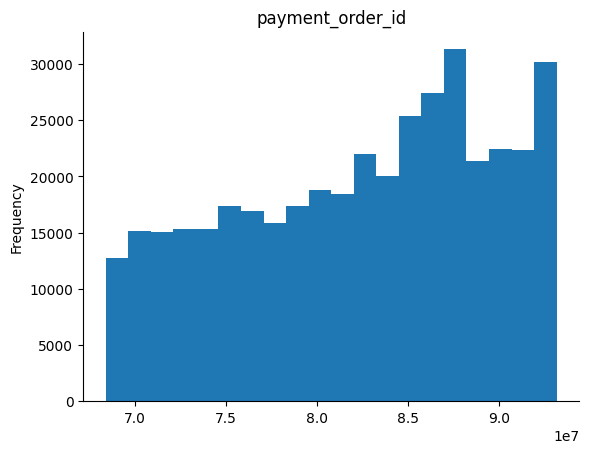

In [ ]:
from matplotlib import pyplot as plt
df['payment_order_id'].plot(kind='hist', bins=20, title='payment_order_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

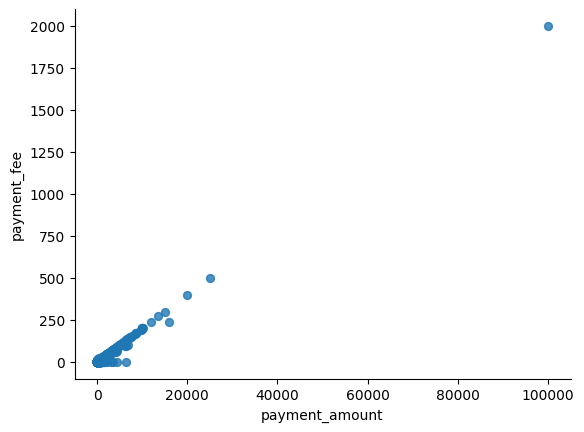

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='payment_amount', y='payment_fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

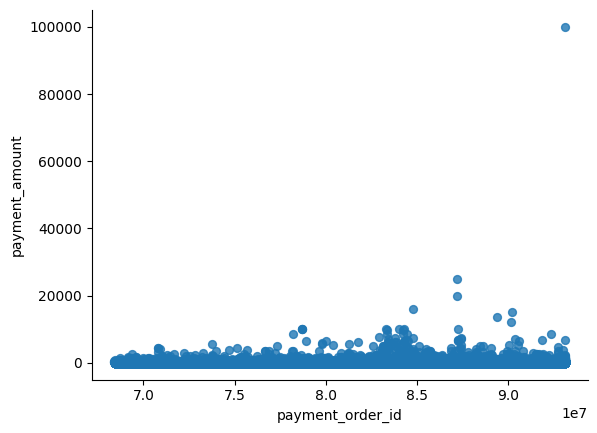

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='payment_order_id', y='payment_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

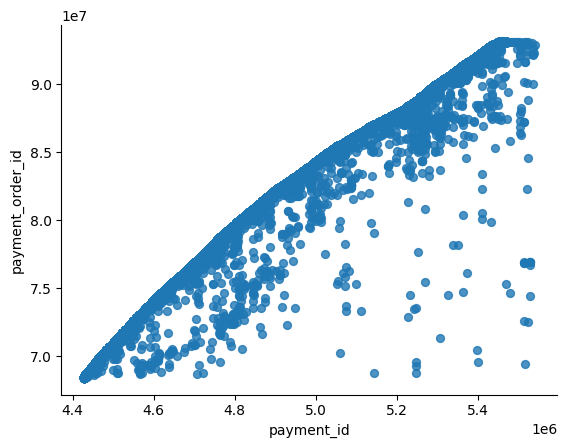

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='payment_id', y='payment_order_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

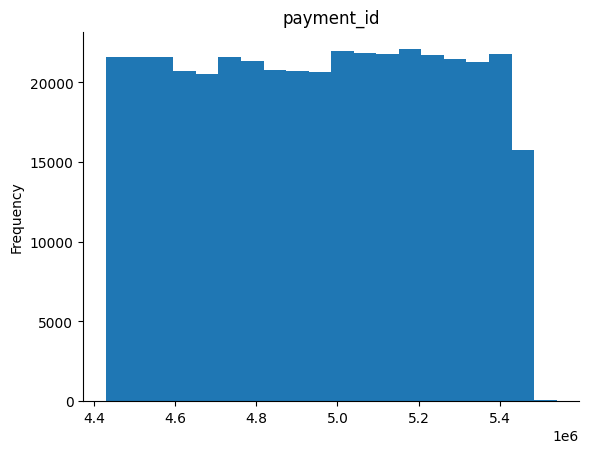

In [ ]:
from matplotlib import pyplot as plt
df['payment_id'].plot(kind='hist', bins=20, title='payment_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['payment_amount'] = pd.to_numeric(df['payment_amount'])
df['payment_fee'] = pd.to_numeric(df['payment_fee'])

In [ ]:
print(df.describe)

<bound method NDFrame.describe of         payment_id  payment_order_id  payment_amount  payment_fee  \
0          4427917          68410055          118.44         0.00   
1          4427918          68410055          394.81         7.90   
2          4427941          68412721          206.95         5.59   
3          4427948          68413340           58.80         1.59   
4          4427955          68414018           45.80         0.92   
...            ...               ...             ...          ...   
400829     5535356          92271189           15.80         0.24   
400830     5535359          90051751           93.30         1.87   
400831     5536362          92645440           43.20         0.65   
400832     5538634          92332079           59.90         0.90   
400833     5540806          92889224           59.80         0.90   

              payment_method payment_status  
0                    VOUCHER           PAID  
1                     ONLINE           PAID  

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'ONLINE'),
  Text(1, 0, 'VOUCHER'),
  Text(2, 0, 'DEBIT'),
  Text(3, 0, 'MEAL_BENEFIT'),
  Text(4, 0, 'STORE_DIRECT_PAYMENT'),
  Text(5, 0, 'CREDIT'),
  Text(6, 0, 'DEBIT_STORE'),
  Text(7, 0, 'VOUCHER_STORE'),
  Text(8, 0, 'PAYMENT_LINK'),
  Text(9, 0, 'CREDIT_STORE'),
  Text(10, 0, 'MONEY'),
  Text(11, 0, 'VOUCHER_DC'),
  Text(12, 0, 'INSTALLMENT_CREDIT_STORE'),
  Text(13, 0, 'VOUCHER_OL'),
  Text(14, 0, 'BANK_TRANSFER_DC')])

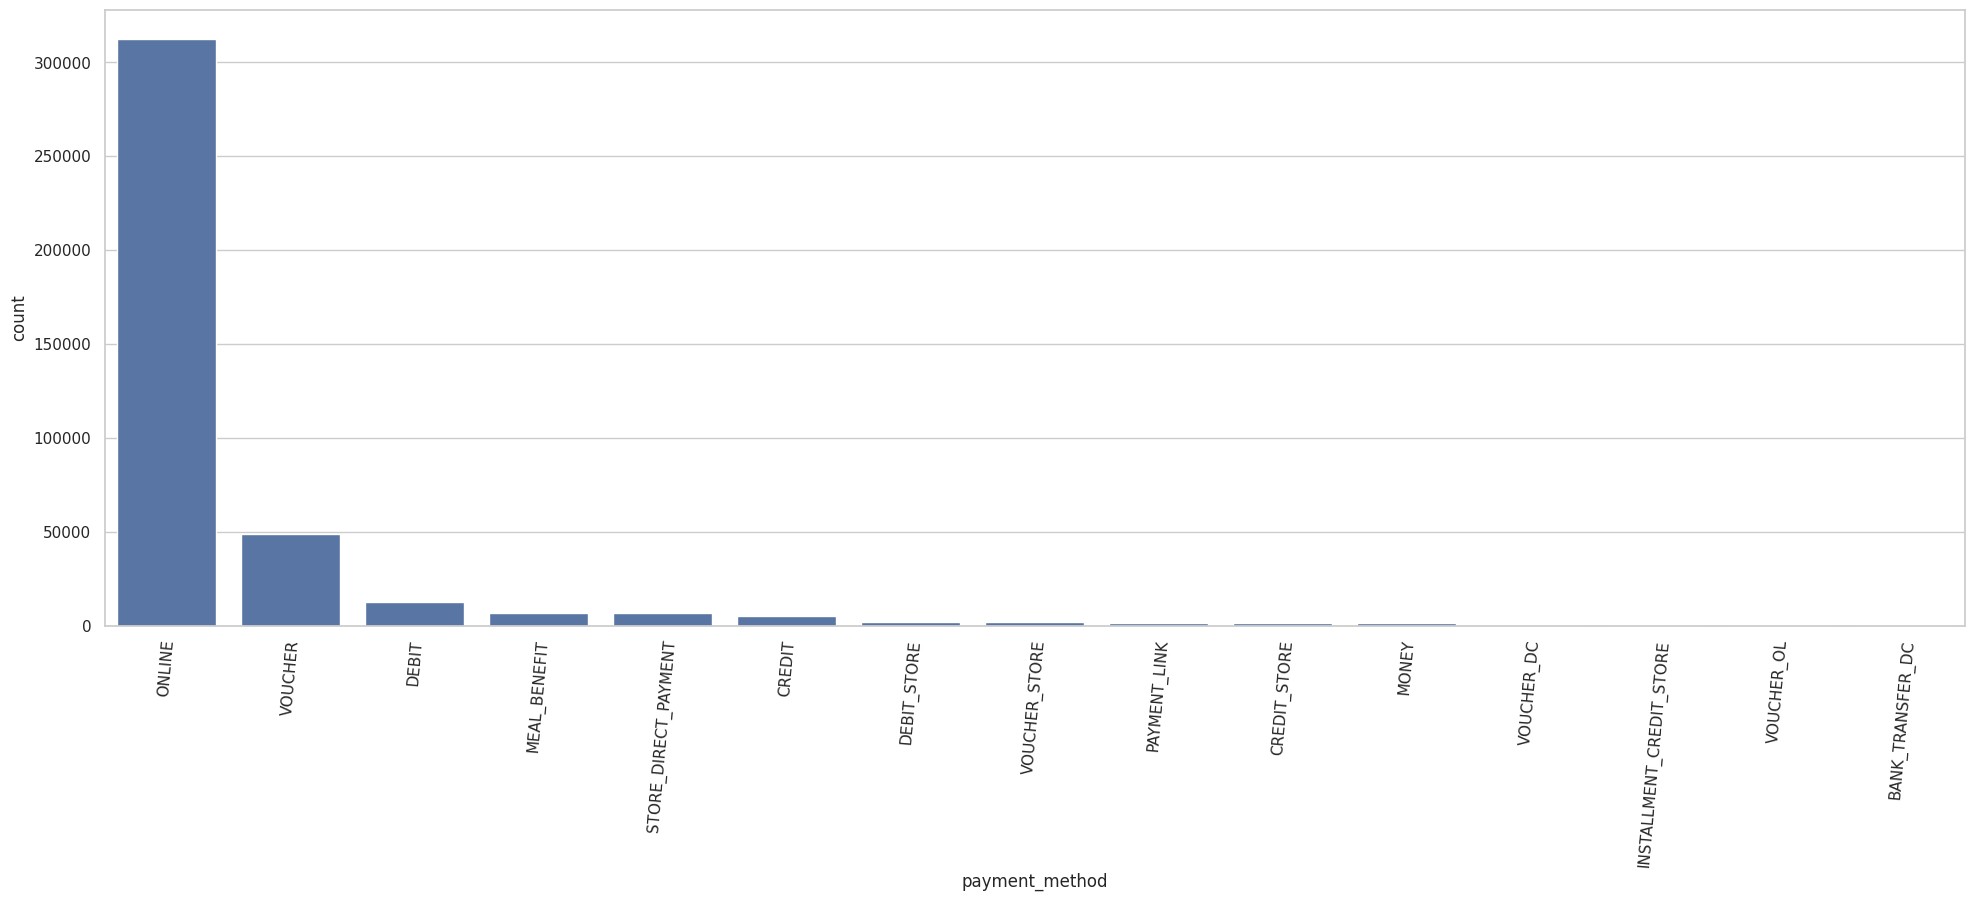

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a planilha de pagamentos (substitua 'payments.csv' pelo caminho correto do seu arquivo)
df = pd.read_csv('/content/payments.csv')

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Contagem de métodos de pagamento
plt.figure(figsize=(24, 8))
sns.countplot(x='payment_method', data=df, order=df['payment_method'].value_counts().index)
plt.title
plt.xticks(rotation=85)


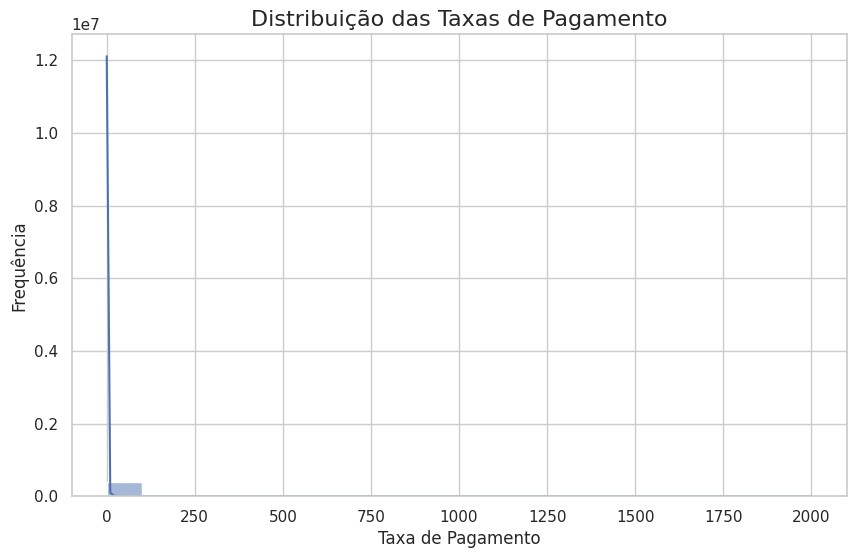

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['payment_fee'], bins=20, kde=True)
plt.title('Distribuição das Taxas de Pagamento', fontsize=16)
plt.xlabel('Taxa de Pagamento', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


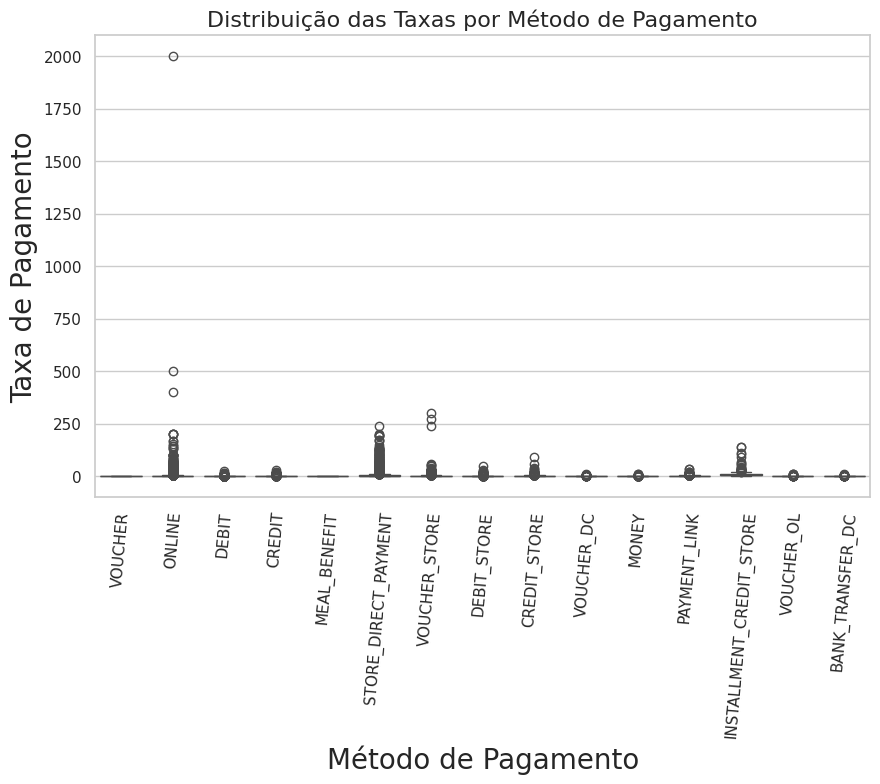

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_method', y='payment_fee', data=df)
plt.title('Distribuição das Taxas por Método de Pagamento', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=20)
plt.ylabel('Taxa de Pagamento', fontsize=20)
plt.xticks(rotation=85)
plt.show()

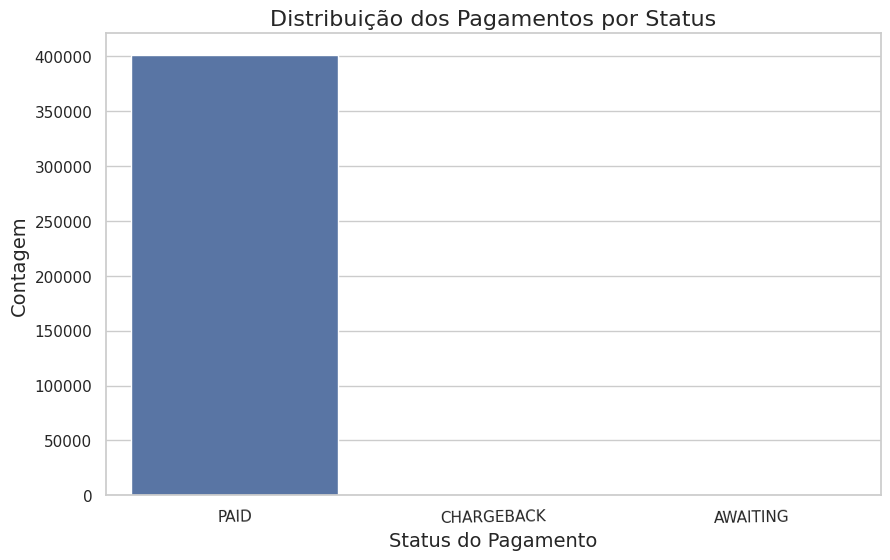

In [ ]:
# Contagem de pagamentos por status
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_status', data=df, order=df['payment_status'].value_counts().index)
plt.title('Distribuição dos Pagamentos por Status', fontsize=16)
plt.xlabel('Status do Pagamento', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(rotation=1)
plt.show()

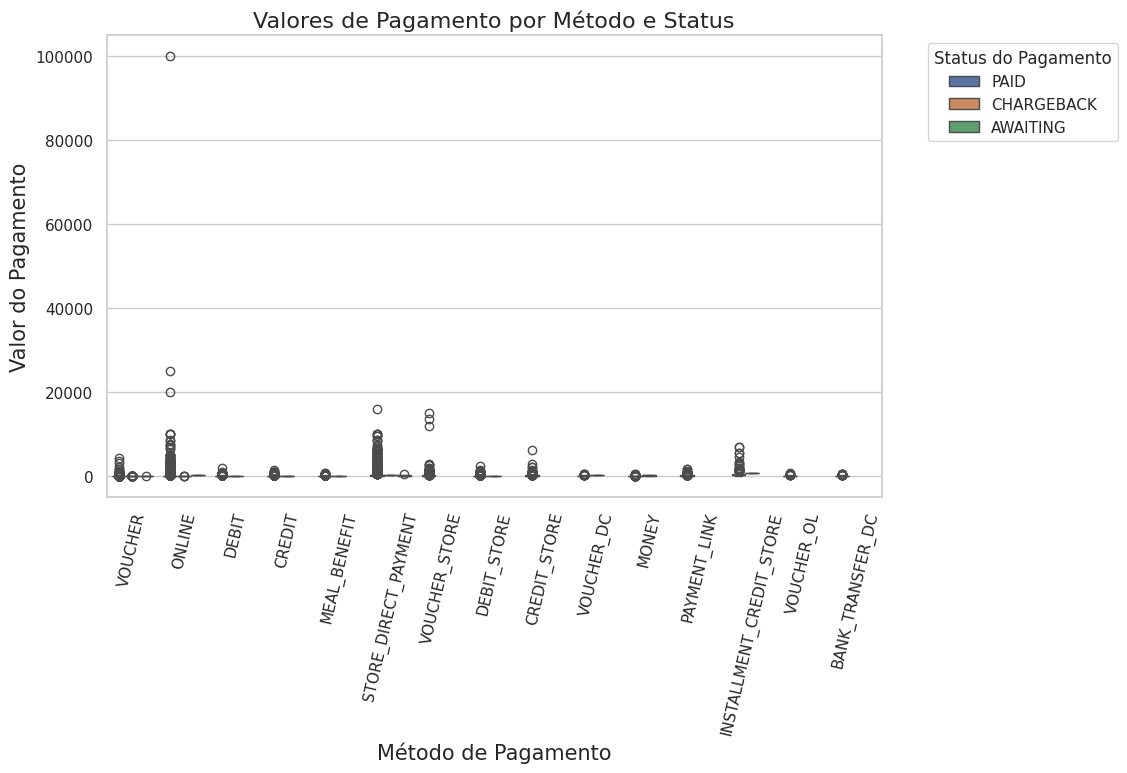

In [ ]:
#valores por método de pagamento
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_method', y='payment_amount', hue='payment_status', data=df)
plt.title('Valores de Pagamento por Método e Status', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=15)
plt.ylabel('Valor do Pagamento', fontsize=15)
plt.xticks(rotation=77)
plt.legend(title='Status do Pagamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
